Data Structure:
    - A systematic way of organizing and accessing data
    
Algorithm:
    - A step-by-step procedure for performing some task in a finite amount of time
    
    
## 1. Experimental Studies

Experimental Studies: 
    - study the algorithm running time by executing it on various test inputs and recording the time spent during each execution.
    
    
1. time function of the time module

Disadvantage: other process might share use of computer's CPU.

In [1]:
from time import time
start_time = time()
l = []
for i in range(1000):
    l.append(i)
end_time = time()
elapsed = end_time - start_time
print(elapsed)

0.00021719932556152344


2. perf_counter function of the time module

Count the number of CPU cycles that are used by algorithm.

Disadvantage: inconsistent result, depend upon the computer system.

In [3]:
from time import perf_counter
start_time = perf_counter()
l = []
for i in range(1000):
    l.append(i)
end_time = perf_counter()
elapsed1 = end_time - start_time
print(elapsed1)
start_time = perf_counter()
l = []
for i in range(1000):
    l.append(i)
end_time = perf_counter()
elapsed2 = end_time - start_time
print(elapsed2)

0.00017871499994726037
0.0001885310002762708


3. timeit module


#### Challenges of Experimental Anlysis

1. Compare different algorithms only in the same hardware and software environments
2. Experiments can be done only on a limited set of test inputs
3. An algorithm must be fully implemented in order to execute it to study its running time experimentally

### 1.1 Moving Beyond Experimental Analysis

#### Counting Primitive Operations

Primitive Operations: 
    - Low-level instruction with an execution time that is constant

A set of primitive oeprations:
    - Assigning an identifier to an object
    - Determining the object associated with an identifier
    - Performing an arithmetic operation
    - Comparing two numbers
    - Accessing a single element of Python list by index
    - Calling a function
    - Returning from a function
    
#### Measuring Operations as a Function of Input Size

Associate with each algorithm, a function $f(n)$ that characterizes the number of primitive operations that are performed as a function of the input size n.

#### Focusing on the Worst-Case Input

## 2. The Seven Functions Used in This Book

### The constant Function

$$f(n) = c$$


### The Logarithm Function

$$f(n) = log_bn$$
<br>
Typically the base is 2 in computer science so:
<br>
$$f(n) = logn = log_2n$$
<br><br>
#### Logarithm Rules

1. $log_b(ac) = log_ba + log_bc$
    - $log(2n) = log2 + logn = 1 + logn$
2. $log_b(a/c) = log_ba - log_bc$
    - $log(n/2) = logn - log2 = logn - 1$
3. $log_b(a^c) = clog_ba$
    - $logn^3 = 3logn$
    - $log2^n = nlog2 = n * 1 = n$
4. $log_ba = log_da/log_db$
    - $log_4n = (logn)/log4 = logn/2$
5. $b^{log_da} = a^{log_db}$
    - $2^{logn} = n^{log2} = n$

### The Linear Function

$$f(n) = n$$
<br>
The algorithm have to do a single basic operation for each of n elements.


### The N_Log-N Function

$$f(n) = nlogn$$


### The Quadratic Function

$$f(n) = n^2$$
<br>
Nested Loops:
1. The inner loop performs a linear number of operations and the outer loop performs a linear number of times.
    - $n * n = n^2$
2. The first iteration of a loop uses one operation, the second uses two operations, and so on.
    - $1 + 2 + 3 + 4 + ... + (n-2) + (n - 1) + n = \frac{n(n+1)}{2}$

### The Cubic Function and Other Polynomials

$$f(n) = n^3$$
<br>
#### Polynomials

$$f(n) = a_0 + a_1n + a_2n^2 + a_3n^3 + a_4n^4 + ...+a_dn^d$$


### The Exponential Function

$$f(n) = b^n$$

#### Exponent Rules

1. $(b^a)^c = b^{ac}$
2. $b^ab^c = b^{a+c}$
3. $b^a/b^c = b^{a-c}$

### 2.1 Comparing Growth Rates

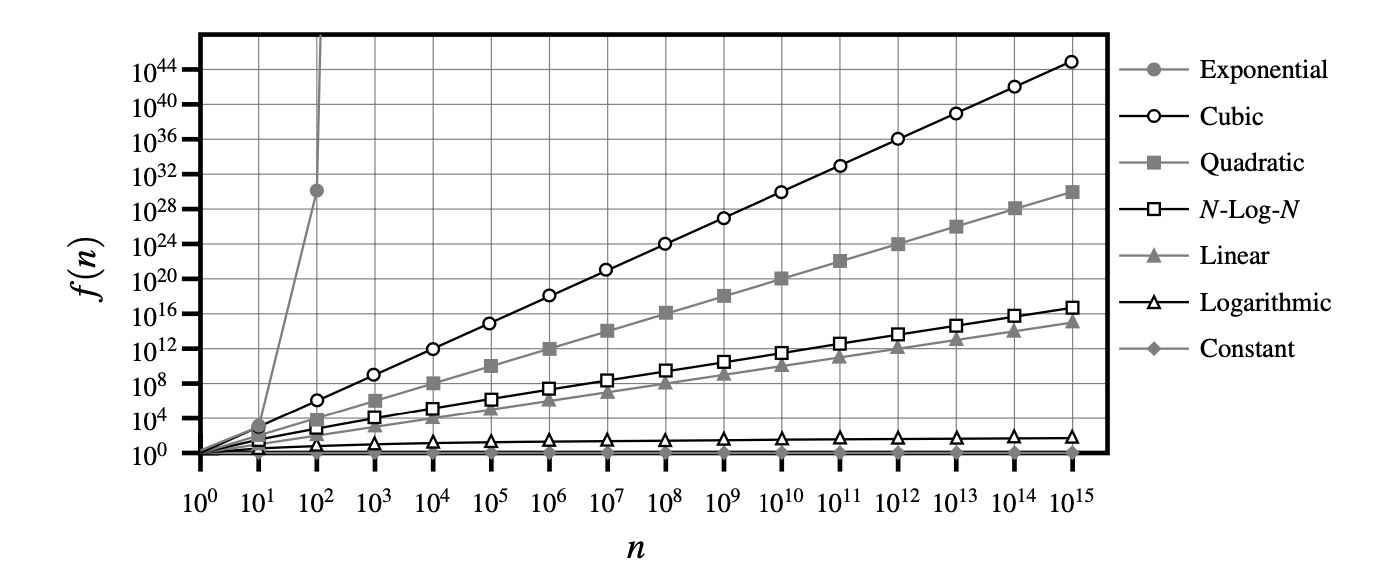

## 3. Asymptotic Analysis

### 3.1 The 'Big-Oh' Notation

We say that f(n) is O(g(n)), if there is a real constant c > 0 and an integer constant $n_0$ >= 1, such that:
<br><br>
$f(n) <= cg(n)$ for n >= $n_0$
<br><br>
So 'f(n) is big-oh of g(n)'

#### Properties
Ignore constant factors and lower-order terms:
<br><br>
$5n^4 + 3n^3 + 2n^2 + 4n + 1$ is $O(n^4)$
<br>
$5n^4 + 3n^3 + 2n^2 + 4n + 1 <= (5 + 3+ 2 + 4 + 1)n^4 = cn^4$, for c = 15, when n > $n_0$ = 1

### 3.3 Examples of Algorithm Analysis

#### 1. find_max function

1. Constant-Time Operations

O(1):
    - len(data), a list instance records the current length of the list.
    - data[j]
    
2. Update anaysis

In the statement updating the current 'biggest' value:
    - In the worst case, the sequence is in increasing order, so we need to update biggest n-1 times
    - if the sequence is in random order, we only update the biggest when the j^th element is the largest in the first j elements, the probability is 1/j. So the expected number of times we update the biggest is:
    
$$H_n = \sum^{n}_{j=1}1/j$$

    - This is known as n^th Harmonic number, O(logn)

So the biggest value is updated by find_max on a randomly ordered sequence is O(logn)

In [4]:
def find_max(data):
    biggest = data[0] # O(1)
    for val in data:  # the loop executes n times, O(n)
        if val > biggest:
            biggest = val
    return biggest    # return statement O(1)
# So the function runs in O(2) + O(n) = O(n) times

#### 2. Prefix Average

Prefix average:
    - Given a sequence S consisting of n numbers
    - compute a sequence A such that A[j] is the average of first j+1 elements of S

1. Quadratic-Time Algorithm

Computes every elements of A separately

In [9]:
def prefix_average1(S):
    # O(1)
    n = len(S)
    # O(n), constant operations per elements
    A = [0] * n 
    # Outer loop: O(n)
    # Inner loop: O(n)
    # The nested loop: O(n^2)
    for j in range(n):
        total = 0
        for i in range(j+1):
            total += S[i]
        A[j] = total / (j+1)
    return A

In [10]:
def prefix_average2(S):
    n = len(S)
    A = [0] * n
    for j in range(n):
        # the sum function: O(j+1)
        # with the counter j: 1+2+3+4+..+n: O(n^2)
        A[j] = sum(S[0:j+1]) / (j+1)
    return A

2. Linear-Time Algorithm

In [11]:
def prefix_average3(S):
    n = len(S)
    A = [0] * n
    total = 0
    for j in range(n):
        total += S[j]
        A[j] = total/(j+1)
    return A

#### 3. Element Uniqueness

Check if all elements of a single sequence are distinct from each other.
<br><br>
The first iteration of the outer loop cases n-1 iterations of the inner loop, the second n-2. So the worst-case running time is:
<br>
$$(n-1) + (n-2) + (n-3) + ... + 2 + 1$$

In [13]:
# O(n^2)
def unique1(S):
    for j in range(len(S)):
        for k in range(j+1, len(S)):
            if S[j] == S[k]:
                return False
    return True

Sorting as tool

In [14]:
# O(nlogn)
def unique2(S):
    # sorted function produces a copy list, worst-case O(nlogn)
    temp = sorted(S)
    for j in range(1, len(temp)):
        if S[j-1] == S[j]:
            return False
    return True

## 4. Simple Justification Techniques

### 4.2 The 'Contra' Attack

#### 1. Contrapositive 对换

    If q is true, then p is true.
    
To justify the statment, only need to establish that

    If p is not true, then q is not true
    

Example:<br><br>
    
    a and b are integers, if ab is even, then a is even or b is even
    
<br>
q: ab is even
<br>
p: a is even or b is even
<br><br>
not q: ab is odd
<br>
not p: a is odd and b is odd
<br><br>
Only need to establish: 
    
    if a is odd and b is odd, then ab is odd.

#### 2. Contradiction 矛盾

To justify the statement, make the oppose statement leads to a contradiction.

    q is true ---> q if false so 2!=2
    
So we assume the opposite:

    if ab is even, then a is odd and b is odd
    
$$a = 2k + 1, b = 2j + 1$$
<br>
$$ab = (2k+1)(2j+1) = 4kj+2k+2j+1$$

ab is even is a contradiction, so the original statement is true.

### 4.3 Induction and Loop Invariants

To justify some statement q(n) is true for all n >= 1

### Induction 归纳法

归纳法的简述：<br>
1. 证明n=1时成立
2. 假设n=m时成立，证明n=m+1时成立
3. 则n=1+1=2时成立，n=2+1=3时成立，以此类推
4. 得到结论，对任意自然数n都成立

**Proposition:** For fibonacci function, F(n) = F(n-2) + F(n-1)
<br><br>
$$F(n) < 2^n$$
<br>
**Justification using Induction:**<br><br>
*Base cases:* (n<=2)
    
    F(1) = 1 < 2^1 = 2
    F(2) = 2 < 2^2 = 4

*Induction Step:*(n>2)

    Suppose our claim is true for all n' < n.
    For F(n) = F(n-2) + F(n-1), both n-2 and n-1 are less than n, apply the inductive assumption:

$$F(n) < 2^{n-2} + 2^{n-1}$$
<br>
    
    Since:
    
$$2^{n-2} + 2^{n-1} < 2^{n-1} + 2^{n-1} = 2*2^{n-1} = 2^n$$

The original proposition is claimed to be true.
